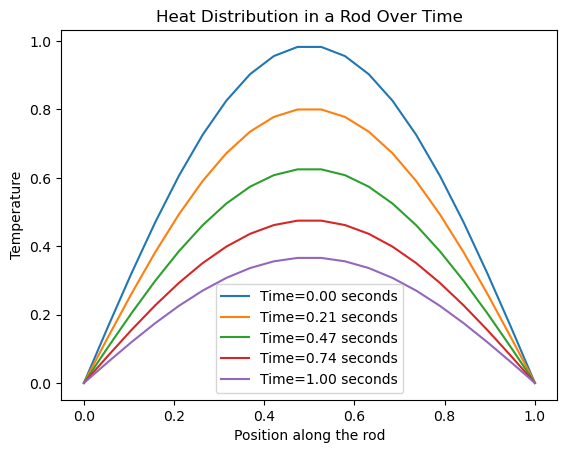

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_parameters(L, T, nx, alpha, plot_times):
    dx = L / (nx - 1)
    r = 0.5
    dt = r * dx**2 / alpha
    nt = int(T / dt) + 1
    plot_steps = (plot_times / dt).astype(int)
    return dx, dt, nt, plot_steps

def initialize_domain(nx, L):
    x = np.linspace(0, L, nx)
    u_initial = np.sin(np.pi * x)
    u_initial[0] = u_initial[-1] = 0
    return x, u_initial

def ftcs_and_plot(u, x, nx, nt, r, dt, plot_steps, plot_times):
    u_new = u.copy()
    for n in range(nt):
        for i in range(1, nx-1):
            u_new[i] = r * u[i-1] + (1-2*r) * u[i] + r * u[i+1]
        u_new[0], u_new[-1] = 0, 0
        u[:] = u_new
        if n in plot_steps:
            plt.plot(x, u, label=f"Time={plot_times[plot_steps == n][0]:.2f} seconds")

def main():
    L, T, nx, alpha = 1, 1, 20, 0.1
    plot_times = np.array([0.00, 0.21, 0.47, 0.74, 1.00])

    dx, dt, nt, plot_steps = initialize_parameters(L, T, nx, alpha, plot_times)
    x, u = initialize_domain(nx, L)
    r = 0.5
    ftcs_and_plot(u, x, nx, nt, r, dt, plot_steps, plot_times)

    plt.title("Heat Distribution in a Rod Over Time")
    plt.xlabel("Position along the rod")
    plt.ylabel("Temperature")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()